In [3]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle
import ast
from datetime import datetime
from collections import Counter
from scipy import save
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.options.mode.chained_assignment = None  # default='warn'

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

# with open(file_to_read) as f:
#     exec(f.read())
# import ast

path_='/mnt/sdb1/sandeep/0. Careers in chess/'
colors = ['navy', 'darkorange','red', 'cornflowerblue']

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        
    plt.tight_layout()

    
from chess_functions import *
from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}
#------------------------------------------------------
ff=10
path_fig='/mnt/sdb1/sandeep/0. Careers in chess/figs/'


In [4]:
with open(path_dicts+'store_player_id_black_.pkl', 'rb') as f:
    store_player_id_black_= pickle.load(f)
    
with open(path_dicts+'store_player_id_white_.pkl', 'rb') as f:
    store_player_id_white_= pickle.load(f)
    

In [5]:
dict_repeated=dict()
t_ic = time.time();
career_in_focus=store_player_id_black_.shape[0]
# career_in_focus=10000000
for it_game in range(career_in_focus):
#     key_=store_player_id_black_[it_game]+'__vs_versus_vs__'+store_player_id_white_[it_game]
    key_2=store_player_id_white_[it_game]+'|'+store_player_id_black_[it_game]
    
#     if key_ in dict_repeated.keys():
#         dict_repeated[key_]=dict_repeated[key_]+1
    if key_2 in dict_repeated.keys():
        dict_repeated[key_2]=dict_repeated[key_2]+1
    else:
        dict_repeated[key_2]=1
    if it_game % 10000 == 0:
        t_oc = time.time();
        print('career number=''--'+str(it_game/(career_in_focus-1))+'--i.e.-'+str(it_game)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')

    

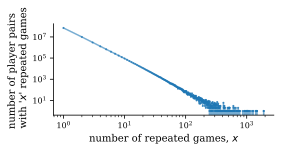

In [17]:
#------------------------------------------------------
bins_=101
op_considered=1

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_
fig = plt.figure(0,figsize=(4, 2));



ax = fig.add_subplot(1, 1,1);
X=np.array(list(dict_repeated.values()))/2

d = np.diff(np.unique(X)).min()
left_of_first_bin = X.min() - float(d)/2
right_of_last_bin = X.max() + float(d)/2
# counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=False)
#     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
ax.plot(xxxx,counts,'.-',alpha=.6,markersize=2.5)



ax.set_xlabel(r"number of repeated games, $x$",fontsize=ff)
ax.set_ylabel("number of player pairs \n with '$x$' repeated games",fontsize=ff)
# ax.set_xlabel(r"weight, $w$",fontsize=ff)
# ax.set_ylabel(r'N($w$)',fontsize=ff)
# ax.set_xticks(np.arange(1,max_hot))
ax.set_yscale('log');
ax.set_xscale('log');



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.tight_layout()
plt.savefig(path_fig+'/fig_review_repeated1.png',dpi=300, bbox_inches = "tight")


In [30]:
# list(dict_repeated.keys())[0:100]

In [16]:
(len(X[X>5])/len(X))

0.0166950976952978